In [1]:
# Energy Consumption Forecasting with ARIMA and SARIMA

In [3]:
## Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import warnings

In [7]:
## Step 2: Load Dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url)
df.columns = ['Month', 'Passengers']
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


       Passengers
count  144.000000
mean   280.298611
std    119.966317
min    104.000000
25%    180.000000
50%    265.500000
75%    360.500000
max    622.000000


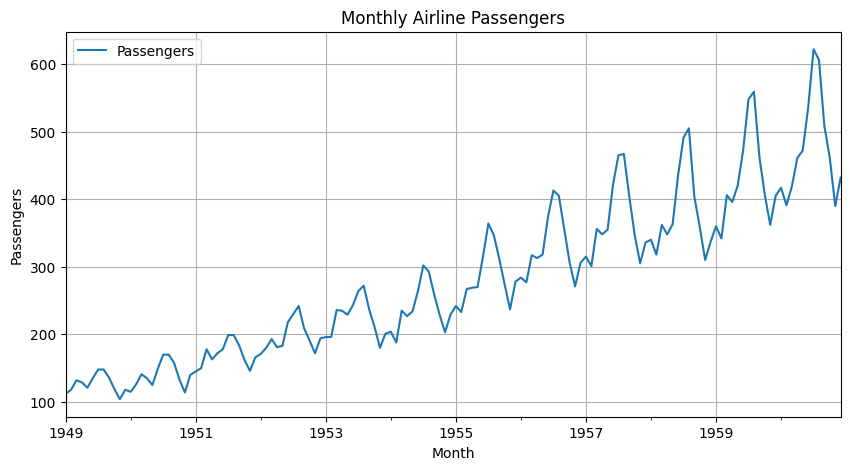

In [9]:
## Step 3: Exploratory Data Analysis
print(df.describe())
df.plot(figsize=(10, 5), title='Monthly Airline Passengers')
plt.ylabel('Passengers')
plt.grid(True)
plt.show()

In [10]:
## Step 4: Stationarity Check
result = adfuller(df['Passengers'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: 0.8153688792060482
p-value: 0.991880243437641


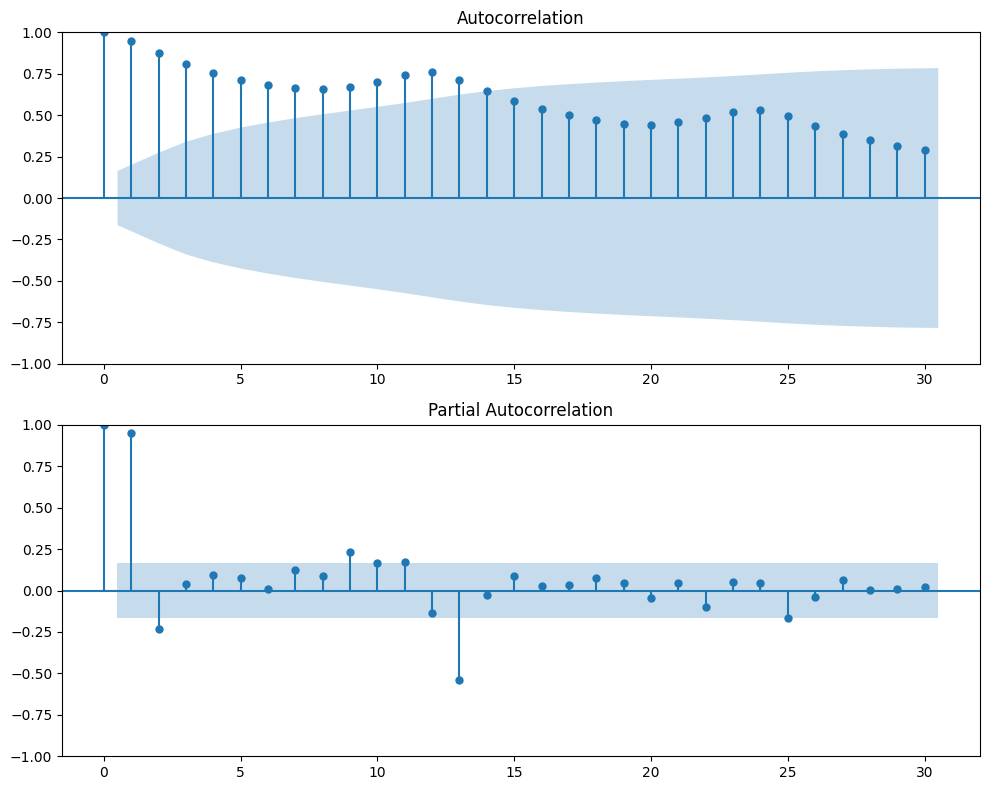

In [13]:
## Step 5: ACF and PACF
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(df['Passengers'], lags=30, ax=ax[0])
plot_pacf(df['Passengers'], lags=30, ax=ax[1])
plt.tight_layout()
plt.show()

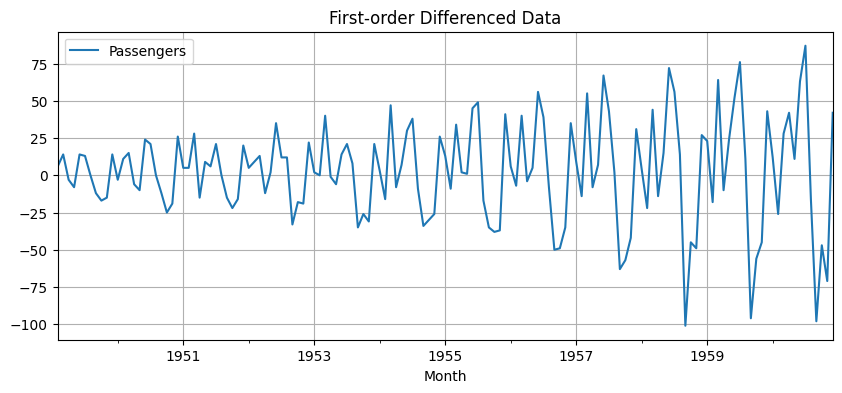

In [14]:
## Step 6: Differencing
df_diff = df.diff().dropna()
df_diff.plot(title='First-order Differenced Data', figsize=(10, 4))
plt.grid(True)
plt.show()

In [15]:
## Step 7: Train-Test Split
train = df.iloc[:-12]
test = df.iloc[-12:]

In [17]:
## Step 8: ARIMA Model
arima_model = ARIMA(train, order=(5,1,0))
arima_result = arima_model.fit()
arima_forecast = arima_result.forecast(steps=12)

In [20]:
## Step 9: SARIMA Model
sarima_model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_result = sarima_model.fit()
sarima_forecast = sarima_result.forecast(steps=12)

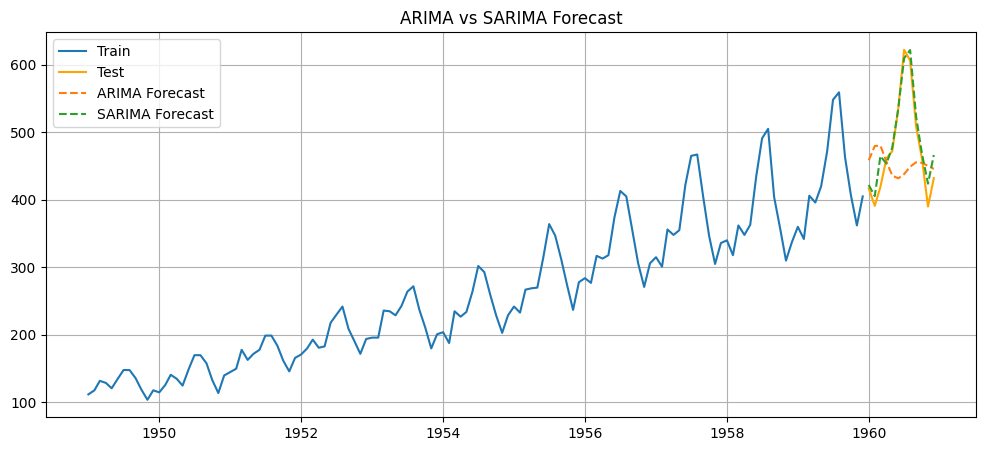

In [23]:
## Step 10: Forecast Comparison
plt.figure(figsize=(12, 5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test', color='orange')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast', linestyle='--')
plt.plot(test.index, sarima_forecast, label='SARIMA Forecast', linestyle='--')
plt.title('ARIMA vs SARIMA Forecast')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
## Step 11: Evaluation
arima_mse = mean_squared_error(test, arima_forecast)
sarima_mse = mean_squared_error(test, sarima_forecast)
print(f'ARIMA MSE: {arima_mse:.2f}')
print(f'SARIMA MSE: {sarima_mse:.2f}')

ARIMA MSE: 7536.00
SARIMA MSE: 449.16


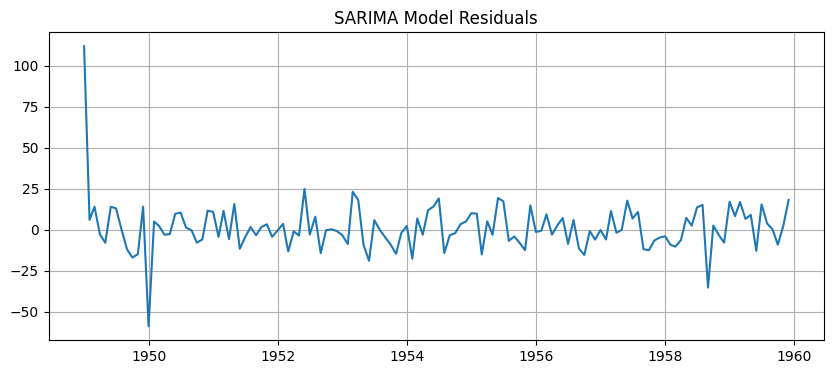

In [27]:
## Step 12: Residual Plot
residuals = sarima_result.resid
plt.figure(figsize=(10, 4))
plt.plot(residuals)
plt.title('SARIMA Model Residuals')
plt.grid(True)
plt.show()

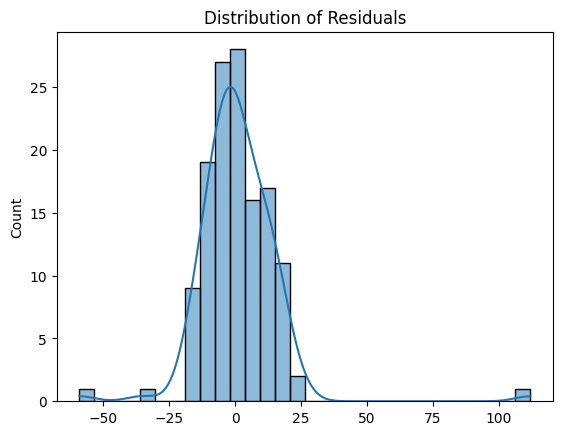

In [29]:
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.show()